In [16]:
!pip install PyDrive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
data = drive.CreateFile({'id':'1sQVMTFZKmHtt7UuxlVCPco5EqbpqRZfS'})
data.GetContentFile('AustinCityLimits.csv')

In [0]:
austData = pd.read_csv('AustinCityLimits.csv')

In [19]:
austData.head()

,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
0,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0.0,101870.0,1.0,113576,1
1,Alabama Shakes,2013,February,winter,F,24,Twenties,N,Rock/Folk/Indie,1.0,73313.0,0.0,298278,1
2,Allen Toussaint,2009,January,winter,M,75,Fifties or Older,N,Jazz/Blues,NaN,308634.0,1.0,10721,0
3,Andrew Bird,2009,October,fall,M,39,Thirties,N,Rock/Folk/Indie,1.0,56343.0,0.0,318313,1
4,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1.0,404439.0,1.0,1711685,1


In [20]:
austData.shape

(116, 14)

### How many of the first 10 artists in the dataset were Grammy winners?

In [21]:
(austData.head(10)['Grammy'] == 'Y').sum()

4

### What genre was played by the first female artist in the dataset who was over 60 years of age?

In [22]:
austData[(austData['Age'] > 60) & (austData['Gender'] == 'F')].head(1)['Genre']

9    Jazz/Blues
Name: Genre, dtype: object

## The Question:  For artists age 30 or older, do female artists play different kinds of music on Austin City Limits than male artists?

### Making a subset dataset of singers 30 years old or older.

In [0]:
age_30_or_older = austData[austData['Age'] > 29]

## Make a bar chart to better visualize how many male and female artists played in each genre.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

genreTable = pd.crosstab(age_30_or_older['Gender'],age_30_or_older['Genre'])
genreTable

Genre,Country,Jazz/Blues,Rock/Folk/Indie,Singer-Songwriter
Gender,,,,
F,6,4,8,7
M,11,7,53,6


###  The fastest way.

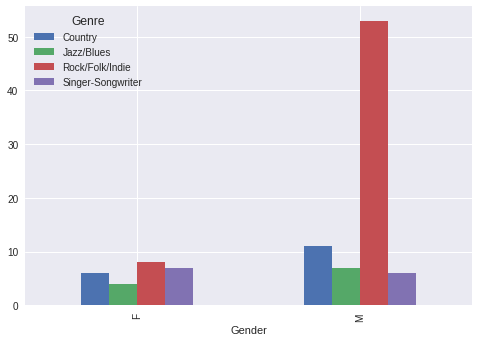

In [25]:
genreTable.plot(kind='bar')

### The count of singers by gender for each music genre.

In [0]:
Fcount = {c: genreTable[c]['F'] for c in genreTable.columns}
Mcount = {c: genreTable[c]['M'] for c in genreTable.columns}

###  The long way

Text(0.5,1,'Male')

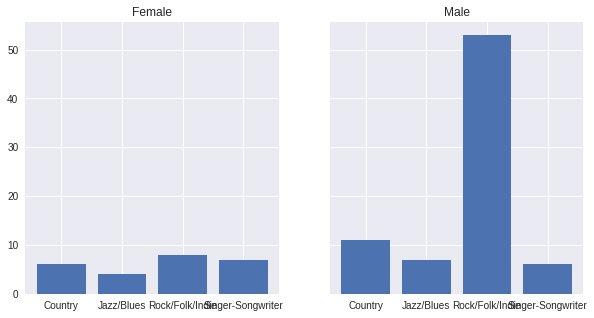

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)

ax[0].bar(list(Fcount.keys()), list(Fcount.values()))
ax[1].bar(list(Mcount.keys()), list(Mcount.values()))

ax[0].set_title('Female')
ax[1].set_title('Male')

### Arranging the DataFrame for plotting more easily.

In [28]:
genreTable_stacked = genreTable.stack().reset_index().rename(columns={0:'Counts'})
genreTable_stacked

,Gender,Genre,Counts
0,F,Country,6
1,F,Jazz/Blues,4
2,F,Rock/Folk/Indie,8
3,F,Singer-Songwriter,7
4,M,Country,11
5,M,Jazz/Blues,7
6,M,Rock/Folk/Indie,53
7,M,Singer-Songwriter,6


### The best way IMO.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


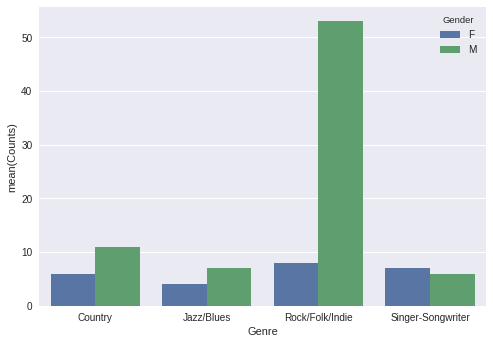

In [29]:
sns.barplot(x='Genre', y='Counts', hue='Gender', data=genreTable_stacked)

### Probability of each music genre being played.

In [30]:
genreCount = genreTable.sum(0) # count of the ocurrence of each gender
genreProb = genreCount / genreCount.sum()
genreProb

Genre
Country              0.166667
Jazz/Blues           0.107843
Rock/Folk/Indie      0.598039
Singer-Songwriter    0.127451
dtype: float64

### Probability of each music genre being played given the singer's gender.

Remember that the genreTable variable contains the contigency table/crosstab of the singers gender and the music genre.

In [31]:
# Female
genreProbF = genreTable.loc['F'] / genreTable.loc['F'].sum()
genreProbF

Genre
Country              0.24
Jazz/Blues           0.16
Rock/Folk/Indie      0.32
Singer-Songwriter    0.28
Name: F, dtype: float64

In [32]:
# Male
genreProbM = genreTable.loc['M'] / genreTable.loc['M'].sum()
genreProbM

Genre
Country              0.142857
Jazz/Blues           0.090909
Rock/Folk/Indie      0.688312
Singer-Songwriter    0.077922
Name: M, dtype: float64

In [33]:
# How many male artists are in the 30+ year old artist subset of the Austin City Limits data
genreTable.loc['M'].sum()

77

In [34]:
# How Many females?
genreTable.loc['F'].sum()

25

## The Lab

### Among male artists is there an association between winning a grammy award and the genre of music that the artist plays?

In [0]:
maleArtists = austData[austData['Gender'] == 'M']

In [0]:
grammyGenreTab = pd.crosstab(maleArtists['Grammy'], maleArtists['Genre'])

In [37]:
grammyGenreTab

Genre,Country,Jazz/Blues,Rock/Folk/Indie,Singer-Songwriter
Grammy,,,,
N,4,3,34,5
Y,7,4,22,2


### Probability of a random male artist of winning a grammy.

In [38]:
grammyMprob = grammyGenreTab.loc['Y'].sum() / maleArtists.shape[0]
grammyMprob

0.43209876543209874

In [0]:
probGrammyByGenre = grammyGenreTab.loc['Y'] / grammyGenreTab.sum(0)

In [40]:
probGrammyByGenre

Genre
Country              0.636364
Jazz/Blues           0.571429
Rock/Folk/Indie      0.392857
Singer-Songwriter    0.285714
dtype: float64

### How many artists in the dataset have 100.000 or more likes on Facebook?

In [0]:
popularArtists = austData[austData['Facebook.100k'] == 1]

In [42]:
popularArtists

,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
0,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0.0,101870.0,1.0,113576,1
1,Alabama Shakes,2013,February,winter,F,24,Twenties,N,Rock/Folk/Indie,1.0,73313.0,0.0,298278,1
3,Andrew Bird,2009,October,fall,M,39,Thirties,N,Rock/Folk/Indie,1.0,56343.0,0.0,318313,1
4,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1.0,404439.0,1.0,1711685,1
6,Avett Brothers,2010,January,winter,M,37,Thirties,N,Rock/Folk/Indie,1.0,125758.0,1.0,563505,1
8,Beck,2003,January,winter,M,43,Forties,Y,Rock/Folk/Indie,1.0,158647.0,1.0,1381051,1
10,Bjork,2007,October,fall,F,47,Forties,N,Singer-Songwriter,1.0,450096.0,1.0,2754505,1
12,Bloc Party,2007,December,winter,M,31,Thirties,N,Rock/Folk/Indie,0.0,114703.0,1.0,1129035,1
13,Blues Traveler,2006,January,winter,M,46,Forties,Y,Rock/Folk/Indie,1.0,23244.0,0.0,164048,1
15,Bon Iver,2012,October,fall,M,32,Thirties,Y,Rock/Folk/Indie,1.0,367417.0,1.0,1626215,1


In [43]:
popularityByAge = popularArtists['Age.Group'].value_counts()
popularityByAge

Thirties            31
Forties             24
Fifties or Older    19
Twenties            11
Name: Age.Group, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


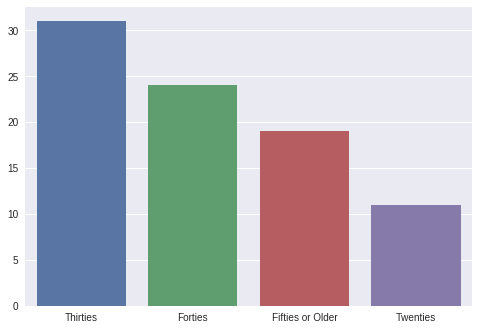

In [44]:
sns.barplot(popularityByAge.index, popularityByAge.values)

In [45]:
popularityByAgeProportion = popularityByAge / popularityByAge.sum()
popularityByAgeProportion

Thirties            0.364706
Forties             0.282353
Fifties or Older    0.223529
Twenties            0.129412
Name: Age.Group, dtype: float64

## Problem Set

## Question 2

In [0]:
studentsData = {
    'A':[5, 8, 11, 9], 
    'B':[10, 10, 5, 9], 
    'C':[9, 9, 4, 4],
    'D':[10, 7, 4, 2],
    'F':[6, 4, 2, 0],
    'Level':['Freshman','Sophomore','Junior','Senior']
}

gradesDf = pd.DataFrame(studentsData)

In [85]:
gradesDf = gradesDf.set_index('Level')
gradesDf

,A,B,C,D,F
Level,,,,,
Freshman,5,10,9,10,6
Sophomore,8,10,9,7,4
Junior,11,5,4,4,2
Senior,9,9,4,2,0


### What proportion of the students received an A?

In [86]:
 gradesDf['A'].sum() / gradesDf.sum(numeric_only=True).sum()

0.2578125

### What proportion of the students where upperclassmen (junior and seniors)?

In [97]:
numJuniors = gradesDf.loc['Junior'].sum()
numSeniors = gradesDf.loc['Senior'].sum()
numAllLevels = gradesDf.sum().sum()
print( (numJuniors + numSeniors) / numAllLevels )

0.390625


### What is the probability that a freshman received a grade of F?

In [92]:
gradesDf.loc['Freshman']['F'] / gradesDf.loc['Freshman'].sum()

0.15

### What is the probability that a randomly selected student from the class would be a sophomore that received a grade of B? 

In [93]:
gradesDf.loc['Sophomore']['B'] / numAllLevels

0.078125

### What proportion of juniors passed the course with a grade of D or better? 

In [102]:
gradesDf.loc['Junior'].drop('F').sum() / numJuniors

0.9230769230769231

### What is the probability that a randomly selected student from this class would be a senior?

In [103]:
numSeniors / numAllLevels

0.1875

###  If a student received a grade of D in the class, what is the probability that the student was a senior?

In [106]:
gradesDf.loc['Senior','D'] / gradesDf['D'].sum()

0.08695652173913043

## Question 3